Classes: ['no', 'yes', 'brain_tumor_dataset']


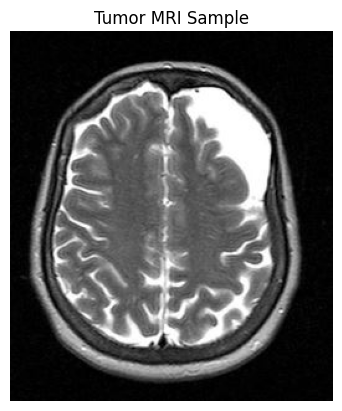

In [12]:
import os
import matplotlib.pyplot as plt
import cv2

# Define path
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"

# Check folders: ['yes', 'no']
print("Classes:", os.listdir(dataset_path))

# View a sample image
img_path = os.path.join(dataset_path, 'yes', os.listdir(os.path.join(dataset_path, 'yes'))[0])
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Tumor MRI Sample")
plt.axis("off")
plt.show()

In [11]:
import os

# List all folders/files inside the /kaggle/input directory
print(os.listdir("/kaggle/input"))

['brain-tumor-mri-dataset', 'brain-mri-images-for-brain-tumor-detection']


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ✅ Define the correct path here
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"

# Image size
IMG_SIZE = 128

data = []
labels = []

categories = ['yes', 'no']

for category in categories:
    path = os.path.join(dataset_path, category)
    label = 1 if category == 'yes' else 0
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

X = np.array(data)
y = np.array(labels)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 202
Testing samples: 51


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model structure
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


2025-05-12 03:18:34.147390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747019914.429009      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747019914.510062      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-12 03:18:50.316740: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=16
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.6483 - loss: 0.6398 - val_accuracy: 0.7255 - val_loss: 0.6172
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.7942 - loss: 0.4712 - val_accuracy: 0.7255 - val_loss: 0.6223
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 0.8689 - loss: 0.3855 - val_accuracy: 0.7647 - val_loss: 0.5549
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.8452 - loss: 0.3926 - val_accuracy: 0.7843 - val_loss: 0.5668
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.8817 - loss: 0.3072 - val_accuracy: 0.7843 - val_loss: 0.5734
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9328 - loss: 0.2315 - val_accuracy: 0.8039 - val_loss: 0.5035
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.9218 - loss: 0.1884 - val_accuracy: 0.7647 - val_loss: 0.5060
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 0.9449 - loss: 0.1394 - val_accuracy: 0.

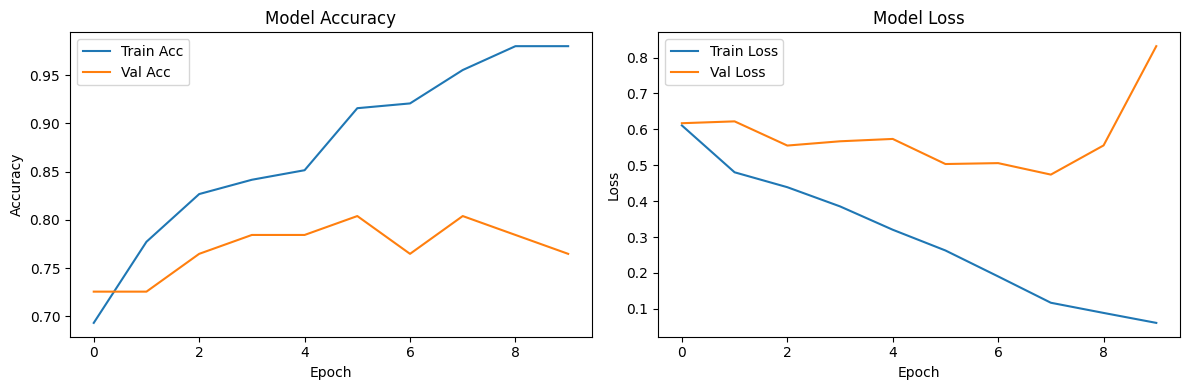

In [8]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import os

root_path = "/kaggle/input"
print("Datasets inside /kaggle/input:", os.listdir(root_path))

# Replace with your actual dataset folder
dataset_path = os.path.join(root_path, "brain-mri-images-for-brain-tumor-detection")  # Adjust if needed

# Check what's inside
if os.path.exists(dataset_path):
    print("Contents of dataset folder:", os.listdir(dataset_path))
    for folder in ['yes', 'no']:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            print(f"{folder} folder has {len(os.listdir(folder_path))} images")
        else:
            print(f"{folder} folder not found!")
else:
    print("Dataset folder not found!")


Datasets inside /kaggle/input: ['brain-mri-images-for-brain-tumor-detection', 'brain-tumor-mri-dataset']
Contents of dataset folder: ['no', 'yes', 'brain_tumor_dataset']
yes folder has 155 images
no folder has 98 images


In [21]:
model.save("brain_tumor_model.h5")
print("✅ Model saved as brain_tumor_model.h5")


✅ Model saved as brain_tumor_model.h5


In [36]:
data = []
labels = []

dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/"

for category in ["yes", "no"]:
    path = os.path.join(dataset_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))
            data.append(image)
            labels.append(1 if category == "yes" else 0)
        except:
            continue


In [38]:
data = np.array(data) / 255.0
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.4700 - loss: 0.6932
Test Accuracy: 47.06%


In [42]:
# Step 1: Model Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - accuracy: 0.5526 - loss: 0.6864 - val_accuracy: 0.5294 - val_loss: 0.7054
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.6349 - loss: 0.6668 - val_accuracy: 0.5294 - val_loss: 0.6928
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.6255 - loss: 0.6676 - val_accuracy: 0.5294 - val_loss: 0.7246
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.6044 - loss: 0.6793 - val_accuracy: 0.5294 - val_loss: 0.7420
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - accuracy: 0.6422 - loss: 0.6540 - val_accuracy: 0.5294 - val_loss: 0.7107
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.6389 - loss: 0.6534 - val_accuracy: 0.5294 - val_loss: 0.6993
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 524ms/step - accuracy: 0.6318 - loss: 0.6577 - val_accuracy: 0.5294 - val_loss: 0.7253
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.6104 - loss: 0.6700 - val_accuracy: 0.5294 - val_loss:

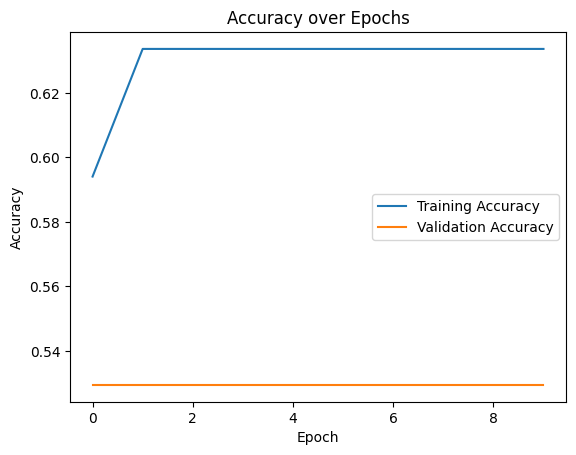

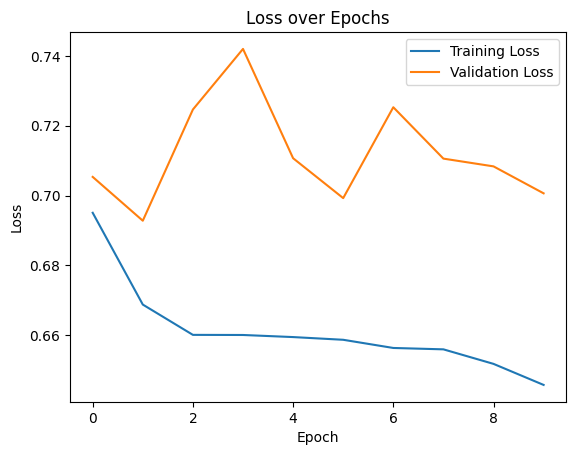

In [43]:
# Step 2: Visualizing Accuracy and Loss
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
import cv2
import numpy as np

def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128))         # Resize to match model input
    img = img / 255.0                         # Normalize
    img = img.reshape(1, 128, 128, 3)         # Reshape for prediction
    
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        print("🧠 Tumor Detected")
    else:
        print("✅ No Tumor Detected")


In [51]:
predict_image("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🧠 Tumor Detected


In [24]:
# Save your trained model to the /kaggle/working directory
model.save("/kaggle/working/brain_tumor_model.h5")

# Confirm that it exists
import os
print("Model exists:", os.path.exists("/kaggle/working/brain_tumor_model.h5"))


Model exists: True
